# Module 3 Final Project:

-  Student Names: Kenny Oh & Moses Lin
-  Student Pace: Full Time
-  Schedule Project Review Date/Time: 8/21/2020
-  Instructor Name: Sean Abu Wilson

Dataset from: https://catalog.data.gov/dataset/terry-stops

# Importing Data and Looking at Dataset

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import sqlite3 
import matplotlib.pyplot as plt
import itertools
import warnings; warnings.simplefilter('ignore')

from pandas import set_option
plt.style.use('ggplot')
pd.set_option('display.max_columns', 1000)
%matplotlib inline 

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from collections import Counter
from IPython.display import Image  
import pydotplus

from scipy.stats import randint

from sklearn import metrics

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import accuracy_score, f1_score, recall_score
from sklearn.metrics import make_scorer, accuracy_score 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import export_graphviz 

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV  
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import KFold 

from sklearn.linear_model import LogisticRegression 

from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectFromModel

from sklearn.pipeline import Pipeline 

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.utils import resample

In [2]:
df = pd.read_csv('Terry_Stops.csv')
df.head(3)

,Subject Age Group,Subject ID,GO / SC Num,Terry Stop ID,Stop Resolution,Weapon Type,Officer ID,Officer YOB,Officer Gender,Officer Race,Subject Perceived Race,Subject Perceived Gender,Reported Date,Reported Time,Initial Call Type,Final Call Type,Call Type,Officer Squad,Arrest Flag,Frisk Flag,Precinct,Sector,Beat
0,-,-1,20140000120677,92317,Arrest,None,7500,1984,M,Black or African American,Asian,Male,2015-10-16T00:00:00,11:32:00,-,-,-,SOUTH PCT 1ST W - ROBERT,N,N,South,O,O2
1,-,-1,20150000001463,28806,Field Contact,None,5670,1965,M,White,-,-,2015-03-19T00:00:00,07:59:00,-,-,-,NaN,N,N,-,-,-
2,-,-1,20150000001516,29599,Field Contact,None,4844,1961,M,White,White,Male,2015-03-21T00:00:00,19:12:00,-,-,-,NaN,N,-,-,-,-


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43496 entries, 0 to 43495
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Subject Age Group         43496 non-null  object
 1   Subject ID                43496 non-null  int64 
 2   GO / SC Num               43496 non-null  int64 
 3   Terry Stop ID             43496 non-null  int64 
 4   Stop Resolution           43496 non-null  object
 5   Weapon Type               43496 non-null  object
 6   Officer ID                43496 non-null  object
 7   Officer YOB               43496 non-null  int64 
 8   Officer Gender            43496 non-null  object
 9   Officer Race              43496 non-null  object
 10  Subject Perceived Race    43496 non-null  object
 11  Subject Perceived Gender  43496 non-null  object
 12  Reported Date             43496 non-null  object
 13  Reported Time             43496 non-null  object
 14  Initial Call Type     

# Cleaning Dataset

In [ ]:
# Dropping columns that provide no real information to us, or is too difficult to work with.
# This is one is including specifics of Seattle Police

# Subject ID, GO/SC Num, Terry Stop ID, Officer ID are not relevant at all
# Call Types has too many null values
# Initial Call Type and Final Call Type have too many different values.

df.drop(columns=['Subject ID', 'GO / SC Num', 'Terry Stop ID', 'Officer ID', 'Call Type', 'Initial Call Type', 'Final Call Type'], inplace=True)
df

In [4]:
# Dropping columns that provide no real information to us, or is too difficult to work with.
# This is one is not including specifics of Seattle Police

# Subject ID, GO/SC Num, Terry Stop ID, Officer ID are not relevant at all
# Call Types has too many null values
# Initial Call Type and Final Call Type have too many different values.
# Officer Squad, Precinct, Sector, Beat are too specific and is similar to ID in not being too relevant

df.drop(columns=['Subject ID', 'GO / SC Num', 'Terry Stop ID', 'Officer ID', 'Call Type', 'Initial Call Type', 'Final Call Type', 'Officer Squad', 'Precinct', 'Sector', 'Beat'], inplace=True)
df

,Subject Age Group,Stop Resolution,Weapon Type,Officer YOB,Officer Gender,Officer Race,Subject Perceived Race,Subject Perceived Gender,Reported Date,Reported Time,Arrest Flag,Frisk Flag
0,-,Arrest,None,1984,M,Black or African American,Asian,Male,2015-10-16T00:00:00,11:32:00,N,N
1,-,Field Contact,None,1965,M,White,-,-,2015-03-19T00:00:00,07:59:00,N,N
2,-,Field Contact,None,1961,M,White,White,Male,2015-03-21T00:00:00,19:12:00,N,-
3,-,Field Contact,None,1963,M,White,-,-,2015-04-01T00:00:00,04:55:00,N,N
4,-,Field Contact,None,1977,M,White,Black or African American,Male,2015-04-03T00:00:00,00:41:00,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...
43491,56 and Above,Arrest,-,1992,M,White,White,Male,2020-07-12T00:00:00,08:20:33,Y,N
43492,56 and Above,Field Contact,-,1995,F,Hispanic or Latino,White,Male,2020-07-21T00:00:00,00:41:13,N,N
43493,56 and Above,Arrest,Firearm,1994,M,Asian,Black or African American,Male,2020-07-26T00:00:00,20:37:41,Y,Y
43494,56 and Above,Field Contact,Knife/Cutting/Stabbing Instrument,1983,M,Two or More Races,Black or African American,Male,2020-08-04T00:00:00,23:07:39,N,Y


In [ ]:
# Renaming columns so that they will be easier to work with.
# This is one is including specifics of Seattle Police

df.columns = ['subject_age_group', 'stop_resolution', 'weapon_type', 'officer_yob', 'officer_gender', 'officer_race', 'subject_perceived_race', 'subject_perceived_gender','reported_date', 'reported_time', 'officer_squad', 'arrest_flag', 'frisk_flag', 'precinct', 'sector', 'beat']
df

In [5]:
# Renaming columns so that they will be easier to work with.
# This is one is not including specifics of Seattle Police

df.columns = ['subject_age_group', 'stop_resolution', 'weapon_type', 'officer_yob', 'officer_gender', 'officer_race', 'subject_perceived_race', 'subject_perceived_gender','reported_date', 'reported_time', 'arrest_flag', 'frisk_flag']
df

,subject_age_group,stop_resolution,weapon_type,officer_yob,officer_gender,officer_race,subject_perceived_race,subject_perceived_gender,reported_date,reported_time,arrest_flag,frisk_flag
0,-,Arrest,None,1984,M,Black or African American,Asian,Male,2015-10-16T00:00:00,11:32:00,N,N
1,-,Field Contact,None,1965,M,White,-,-,2015-03-19T00:00:00,07:59:00,N,N
2,-,Field Contact,None,1961,M,White,White,Male,2015-03-21T00:00:00,19:12:00,N,-
3,-,Field Contact,None,1963,M,White,-,-,2015-04-01T00:00:00,04:55:00,N,N
4,-,Field Contact,None,1977,M,White,Black or African American,Male,2015-04-03T00:00:00,00:41:00,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...
43491,56 and Above,Arrest,-,1992,M,White,White,Male,2020-07-12T00:00:00,08:20:33,Y,N
43492,56 and Above,Field Contact,-,1995,F,Hispanic or Latino,White,Male,2020-07-21T00:00:00,00:41:13,N,N
43493,56 and Above,Arrest,Firearm,1994,M,Asian,Black or African American,Male,2020-07-26T00:00:00,20:37:41,Y,Y
43494,56 and Above,Field Contact,Knife/Cutting/Stabbing Instrument,1983,M,Two or More Races,Black or African American,Male,2020-08-04T00:00:00,23:07:39,N,Y


In [6]:
# Seeing what values we have for each column to work with.

#df['subject_age_group'].value_counts()
#df['stop_resolution'].value_counts()
#df['weapon_type'].value_counts()
#df['officer_yob'].value_counts()
#df['officer_race'].value_counts()
#df['subject_perceived_race'].value_counts()
#df['subject_perceived_gender'].value_counts()
#df['arrest_flag'].value_counts()
#df['frisk_flag'].value_counts()
#df['officer_squad'].value_counts()
#df['precinct'].value_counts()
#df['sector'].value_counts()
#df['beat'].value_counts()

In [7]:
# 1371 Entries without an age group. Will remove.

df = df[df.subject_age_group != '-']
df

,subject_age_group,stop_resolution,weapon_type,officer_yob,officer_gender,officer_race,subject_perceived_race,subject_perceived_gender,reported_date,reported_time,arrest_flag,frisk_flag
128,36 - 45,Offense Report,None,1985,M,White,Unknown,Male,2018-09-23T00:00:00,18:35:00,N,N
130,56 and Above,Field Contact,-,1995,M,White,White,Male,2019-12-11T00:00:00,01:25:31,N,N
175,36 - 45,Offense Report,None,1992,M,White,White,Female,2018-09-24T00:00:00,03:21:00,N,N
200,56 and Above,Arrest,-,1989,M,White,Asian,Male,2019-12-21T00:00:00,21:02:58,Y,Y
703,56 and Above,Field Contact,-,1972,M,White,White,Male,2019-12-25T00:00:00,11:42:08,N,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
43491,56 and Above,Arrest,-,1992,M,White,White,Male,2020-07-12T00:00:00,08:20:33,Y,N
43492,56 and Above,Field Contact,-,1995,F,Hispanic or Latino,White,Male,2020-07-21T00:00:00,00:41:13,N,N
43493,56 and Above,Arrest,Firearm,1994,M,Asian,Black or African American,Male,2020-07-26T00:00:00,20:37:41,Y,Y
43494,56 and Above,Field Contact,Knife/Cutting/Stabbing Instrument,1983,M,Two or More Races,Black or African American,Male,2020-08-04T00:00:00,23:07:39,N,Y


In [8]:
# 8091 Entries with null value. Will assume it means the officer did not check whether for weapons so we do not lose too much data.

df['weapon_type'] = df['weapon_type'].replace(['-'], 'Did Not Check')

# Will classify weapons into more manageable categories, as some are redundant.


df['weapon_type'] = df['weapon_type'].replace(['Handgun', 'Firearm Other', 'Firearm (unk type)', 'Other Firearm', 'Rifle', 'Shotgun', 'Automatic Handgun'], 'Firearm')
df['weapon_type'] = df['weapon_type'].replace(['Lethal Cutting Instrument', 'Knife/Cutting/Stabbing Instrument', 'Blunt Object/Striking Implement', 'Club, Blackjack, Brass Knuckles', 'Club', 'Blackjack', 'Brass Knuckles'], 'Melee Weapon')
df['weapon_type'] = df['weapon_type'].replace(['None/Not Applicable'], 'None')
df['weapon_type'] = df['weapon_type'].replace(['Mace/Pepper Spray', 'Taser/Stun Gun', 'Fire/Incendiary Device'], 'Other')
df['weapon_type'].value_counts()

None             31607
Did Not Check     8091
Melee Weapon      1990
Firearm            415
Other               22
Name: weapon_type, dtype: int64

In [9]:
# Strange to not know own officer's race. Will remove 17 entries.

df = df[df.officer_race != 'Unknown']
df

,subject_age_group,stop_resolution,weapon_type,officer_yob,officer_gender,officer_race,subject_perceived_race,subject_perceived_gender,reported_date,reported_time,arrest_flag,frisk_flag
128,36 - 45,Offense Report,None,1985,M,White,Unknown,Male,2018-09-23T00:00:00,18:35:00,N,N
130,56 and Above,Field Contact,Did Not Check,1995,M,White,White,Male,2019-12-11T00:00:00,01:25:31,N,N
175,36 - 45,Offense Report,None,1992,M,White,White,Female,2018-09-24T00:00:00,03:21:00,N,N
200,56 and Above,Arrest,Did Not Check,1989,M,White,Asian,Male,2019-12-21T00:00:00,21:02:58,Y,Y
703,56 and Above,Field Contact,Did Not Check,1972,M,White,White,Male,2019-12-25T00:00:00,11:42:08,N,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
43491,56 and Above,Arrest,Did Not Check,1992,M,White,White,Male,2020-07-12T00:00:00,08:20:33,Y,N
43492,56 and Above,Field Contact,Did Not Check,1995,F,Hispanic or Latino,White,Male,2020-07-21T00:00:00,00:41:13,N,N
43493,56 and Above,Arrest,Firearm,1994,M,Asian,Black or African American,Male,2020-07-26T00:00:00,20:37:41,Y,Y
43494,56 and Above,Field Contact,Melee Weapon,1983,M,Two or More Races,Black or African American,Male,2020-08-04T00:00:00,23:07:39,N,Y


In [10]:
# Removing unrecorded race entries. Losing 1276 entries.

df = df[df.subject_perceived_race != '-']
df

,subject_age_group,stop_resolution,weapon_type,officer_yob,officer_gender,officer_race,subject_perceived_race,subject_perceived_gender,reported_date,reported_time,arrest_flag,frisk_flag
128,36 - 45,Offense Report,None,1985,M,White,Unknown,Male,2018-09-23T00:00:00,18:35:00,N,N
130,56 and Above,Field Contact,Did Not Check,1995,M,White,White,Male,2019-12-11T00:00:00,01:25:31,N,N
175,36 - 45,Offense Report,None,1992,M,White,White,Female,2018-09-24T00:00:00,03:21:00,N,N
200,56 and Above,Arrest,Did Not Check,1989,M,White,Asian,Male,2019-12-21T00:00:00,21:02:58,Y,Y
703,56 and Above,Field Contact,Did Not Check,1972,M,White,White,Male,2019-12-25T00:00:00,11:42:08,N,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
43491,56 and Above,Arrest,Did Not Check,1992,M,White,White,Male,2020-07-12T00:00:00,08:20:33,Y,N
43492,56 and Above,Field Contact,Did Not Check,1995,F,Hispanic or Latino,White,Male,2020-07-21T00:00:00,00:41:13,N,N
43493,56 and Above,Arrest,Firearm,1994,M,Asian,Black or African American,Male,2020-07-26T00:00:00,20:37:41,Y,Y
43494,56 and Above,Field Contact,Melee Weapon,1983,M,Two or More Races,Black or African American,Male,2020-08-04T00:00:00,23:07:39,N,Y


In [11]:
# Combining three categories since they are similar in terms of what they mean in this scenario

df['subject_perceived_gender'] = df['subject_perceived_gender'].replace(['-', 'Unknown', 'Gender Diverse'], 'Unable to Determine') 
df

,subject_age_group,stop_resolution,weapon_type,officer_yob,officer_gender,officer_race,subject_perceived_race,subject_perceived_gender,reported_date,reported_time,arrest_flag,frisk_flag
128,36 - 45,Offense Report,None,1985,M,White,Unknown,Male,2018-09-23T00:00:00,18:35:00,N,N
130,56 and Above,Field Contact,Did Not Check,1995,M,White,White,Male,2019-12-11T00:00:00,01:25:31,N,N
175,36 - 45,Offense Report,None,1992,M,White,White,Female,2018-09-24T00:00:00,03:21:00,N,N
200,56 and Above,Arrest,Did Not Check,1989,M,White,Asian,Male,2019-12-21T00:00:00,21:02:58,Y,Y
703,56 and Above,Field Contact,Did Not Check,1972,M,White,White,Male,2019-12-25T00:00:00,11:42:08,N,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
43491,56 and Above,Arrest,Did Not Check,1992,M,White,White,Male,2020-07-12T00:00:00,08:20:33,Y,N
43492,56 and Above,Field Contact,Did Not Check,1995,F,Hispanic or Latino,White,Male,2020-07-21T00:00:00,00:41:13,N,N
43493,56 and Above,Arrest,Firearm,1994,M,Asian,Black or African American,Male,2020-07-26T00:00:00,20:37:41,Y,Y
43494,56 and Above,Field Contact,Melee Weapon,1983,M,Two or More Races,Black or African American,Male,2020-08-04T00:00:00,23:07:39,N,Y


In [12]:
# Removing 391 entries that are not labeled.

df = df[df.frisk_flag != '-']
df

,subject_age_group,stop_resolution,weapon_type,officer_yob,officer_gender,officer_race,subject_perceived_race,subject_perceived_gender,reported_date,reported_time,arrest_flag,frisk_flag
128,36 - 45,Offense Report,None,1985,M,White,Unknown,Male,2018-09-23T00:00:00,18:35:00,N,N
130,56 and Above,Field Contact,Did Not Check,1995,M,White,White,Male,2019-12-11T00:00:00,01:25:31,N,N
175,36 - 45,Offense Report,None,1992,M,White,White,Female,2018-09-24T00:00:00,03:21:00,N,N
200,56 and Above,Arrest,Did Not Check,1989,M,White,Asian,Male,2019-12-21T00:00:00,21:02:58,Y,Y
703,56 and Above,Field Contact,Did Not Check,1972,M,White,White,Male,2019-12-25T00:00:00,11:42:08,N,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
43491,56 and Above,Arrest,Did Not Check,1992,M,White,White,Male,2020-07-12T00:00:00,08:20:33,Y,N
43492,56 and Above,Field Contact,Did Not Check,1995,F,Hispanic or Latino,White,Male,2020-07-21T00:00:00,00:41:13,N,N
43493,56 and Above,Arrest,Firearm,1994,M,Asian,Black or African American,Male,2020-07-26T00:00:00,20:37:41,Y,Y
43494,56 and Above,Field Contact,Melee Weapon,1983,M,Two or More Races,Black or African American,Male,2020-08-04T00:00:00,23:07:39,N,Y


In [13]:
# Checking the number of arrests and no arrests.

df['arrest_flag'] = df['arrest_flag'].replace(['Y'], 1)
df['arrest_flag'] = df['arrest_flag'].replace(['N'], 0)
df['arrest_flag'].value_counts()

0    38256
1     2185
Name: arrest_flag, dtype: int64

In [ ]:
# Only run this if using specifics of Seattle Police
# Remove values that are not useable.

df = df[df.officer_squad != '-']
df = df[df.precinct != '-']
df = df[df.precinct != 'Unknown']
df = df[df.sector != '-']
df = df[df.beat != '-']
df

# Feature Engineering

In [14]:
# Changing reported_time into useable values.

# Morning = 5am - 12pm
# Afternoon = 1pm to 5pm
# Evening = 6pm to 9pm
# Night = 10pm to 4am

from datetime import datetime
df['reported_hour'] = df['reported_time'].apply(pd.to_datetime).dt.hour
df.drop(['reported_time'], axis=1, inplace=True)
df.head(3)

,subject_age_group,stop_resolution,weapon_type,officer_yob,officer_gender,officer_race,subject_perceived_race,subject_perceived_gender,reported_date,arrest_flag,frisk_flag,reported_hour
128,36 - 45,Offense Report,None,1985,M,White,Unknown,Male,2018-09-23T00:00:00,0,N,18
130,56 and Above,Field Contact,Did Not Check,1995,M,White,White,Male,2019-12-11T00:00:00,0,N,1
175,36 - 45,Offense Report,None,1992,M,White,White,Female,2018-09-24T00:00:00,0,N,3


In [15]:
df['reported_hour'] = df['reported_hour'].replace([5, 6, 7, 8, 9, 10, 11, 12], 'morning')
df['reported_hour'] = df['reported_hour'].replace([13, 14, 15, 16, 17], 'afternoon')
df['reported_hour'] = df['reported_hour'].replace([18, 19, 20, 21], 'evening')
df['reported_hour'] = df['reported_hour'].replace([22, 23, 0, 1, 2, 3, 4], 'night')
df['reported_hour'].value_counts()

night        13150
morning      10457
afternoon     9439
evening       7395
Name: reported_hour, dtype: int64

In [16]:
df['reported_date'] = df['reported_date'].str.slice(0, 4, 1)
df

,subject_age_group,stop_resolution,weapon_type,officer_yob,officer_gender,officer_race,subject_perceived_race,subject_perceived_gender,reported_date,arrest_flag,frisk_flag,reported_hour
128,36 - 45,Offense Report,None,1985,M,White,Unknown,Male,2018,0,N,evening
130,56 and Above,Field Contact,Did Not Check,1995,M,White,White,Male,2019,0,N,night
175,36 - 45,Offense Report,None,1992,M,White,White,Female,2018,0,N,night
200,56 and Above,Arrest,Did Not Check,1989,M,White,Asian,Male,2019,1,Y,evening
703,56 and Above,Field Contact,Did Not Check,1972,M,White,White,Male,2019,0,Y,morning
...,...,...,...,...,...,...,...,...,...,...,...,...
43491,56 and Above,Arrest,Did Not Check,1992,M,White,White,Male,2020,1,N,morning
43492,56 and Above,Field Contact,Did Not Check,1995,F,Hispanic or Latino,White,Male,2020,0,N,night
43493,56 and Above,Arrest,Firearm,1994,M,Asian,Black or African American,Male,2020,1,Y,evening
43494,56 and Above,Field Contact,Melee Weapon,1983,M,Two or More Races,Black or African American,Male,2020,0,Y,night


In [17]:
# reported_date is a str as of now

df['reported_date'] = df['reported_date'].astype(int)

In [18]:
df['officer_age'] = df['reported_date'] - df['officer_yob']
df.drop(['officer_yob', 'reported_date'], axis=1, inplace=True)
df.head()

,subject_age_group,stop_resolution,weapon_type,officer_gender,officer_race,subject_perceived_race,subject_perceived_gender,arrest_flag,frisk_flag,reported_hour,officer_age
128,36 - 45,Offense Report,None,M,White,Unknown,Male,0,N,evening,33
130,56 and Above,Field Contact,Did Not Check,M,White,White,Male,0,N,night,24
175,36 - 45,Offense Report,None,M,White,White,Female,0,N,night,26
200,56 and Above,Arrest,Did Not Check,M,White,Asian,Male,1,Y,evening,30
703,56 and Above,Field Contact,Did Not Check,M,White,White,Male,0,Y,morning,47


In [ ]:
# Generate Dummy Variable for literally everything
# This is one is including specifics of Seattle Police

dummyf =  pd.get_dummies(df, columns=['subject_age_group', 'stop_resolution', 'weapon_type', 
'officer_gender', 'officer_race', 'subject_perceived_race', 'subject_perceived_gender', 'officer_squad', 'frisk_flag', 'precinct', 'sector', 'beat', 
'reported_hour'])

dummyf

In [19]:
# Generate Dummy Variable for literally everything
# This is one is not including specifics of Seattle Police

dummyf =  pd.get_dummies(df, columns=['subject_age_group', 'stop_resolution', 'weapon_type', 
'officer_gender', 'officer_race', 'subject_perceived_race', 'subject_perceived_gender', 'frisk_flag', 
'reported_hour'])

dummyf

,arrest_flag,officer_age,subject_age_group_1 - 17,subject_age_group_18 - 25,subject_age_group_26 - 35,subject_age_group_36 - 45,subject_age_group_46 - 55,subject_age_group_56 and Above,stop_resolution_Arrest,stop_resolution_Citation / Infraction,stop_resolution_Field Contact,stop_resolution_Offense Report,stop_resolution_Referred for Prosecution,weapon_type_Did Not Check,weapon_type_Firearm,weapon_type_Melee Weapon,weapon_type_None,weapon_type_Other,officer_gender_F,officer_gender_M,officer_race_American Indian/Alaska Native,officer_race_Asian,officer_race_Black or African American,officer_race_Hispanic or Latino,officer_race_Nat Hawaiian/Oth Pac Islander,officer_race_Not Specified,officer_race_Two or More Races,officer_race_White,subject_perceived_race_American Indian or Alaska Native,subject_perceived_race_Asian,subject_perceived_race_Black or African American,subject_perceived_race_Hispanic,subject_perceived_race_Multi-Racial,subject_perceived_race_Native Hawaiian or Other Pacific Islander,subject_perceived_race_Other,subject_perceived_race_Unknown,subject_perceived_race_White,subject_perceived_gender_Female,subject_perceived_gender_Gender Diverse (gender non-conforming and/or transgender),subject_perceived_gender_Male,subject_perceived_gender_Unable to Determine,frisk_flag_N,frisk_flag_Y,reported_hour_afternoon,reported_hour_evening,reported_hour_morning,reported_hour_night
128,0,33,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0
130,0,24,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1
175,0,26,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1
200,1,30,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0
703,0,47,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43491,1,28,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0
43492,0,25,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1
43493,1,26,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0
43494,0,37,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1


# Exploratory Data Analysis

In [132]:
weapons = df['weapon_type'].groupby(by=df['arrest_flag']).value_counts()

Text(0.5, 1.0, 'Weapon Type Count for no Arrest')

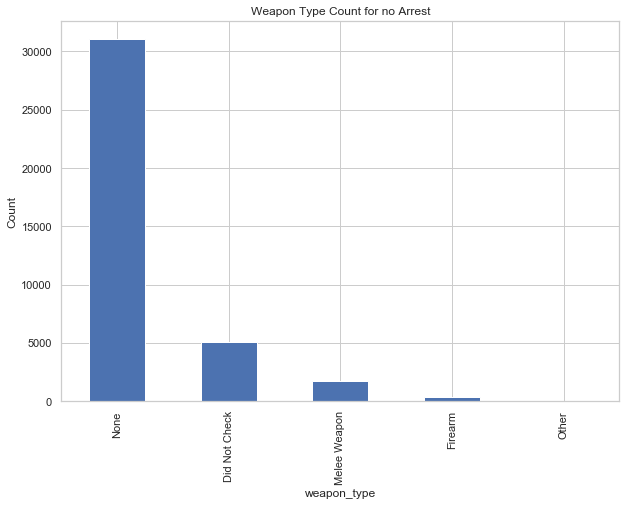

In [127]:
fig, ax = plt.subplots(figsize=(10, 7))

weapons[0].plot(kind='bar')
ax.set_ylabel('Count')
ax.set_title('Weapon Type Count for no Arrest')

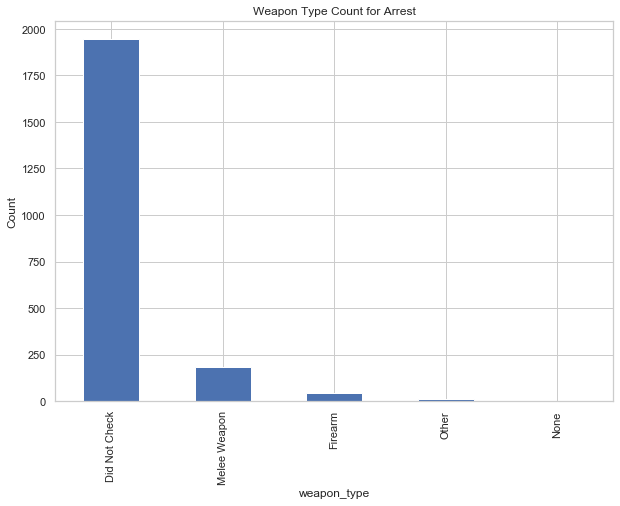

In [135]:
fig, ax = plt.subplots(figsize=(10, 7))

weapons[1].plot(kind='bar')
ax.set_ylabel('Count')
ax.set_title('Weapon Type Count for Arrest');

# Class Imbalance

In [20]:
# Target = arrest_flag
# Features = everything else

target = dummyf['arrest_flag'] 
features = dummyf.drop(['arrest_flag'], axis=1)

In [21]:
# ~94.56% of the data are no arrests made.
# Need to balance the data.

target.value_counts()

0    38256
1     2185
Name: arrest_flag, dtype: int64

In [22]:
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=14,test_size=0.20)

In [23]:
y_test_noarrest = y_test.value_counts()[0]
y_test_arrest = y_test.value_counts()[1]

In [24]:
# Baseline model is created

lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)

pred = lr_model.predict(X_test)

log_f1 = metrics.f1_score(y_test, pred)
log_acc = metrics.accuracy_score(y_test, pred)

print('Test F1 Score: ', log_f1)
print('Test Accuracy Score: ', log_acc)

Test F1 Score:  0.9395973154362417
Test Accuracy Score:  0.9944368896031648


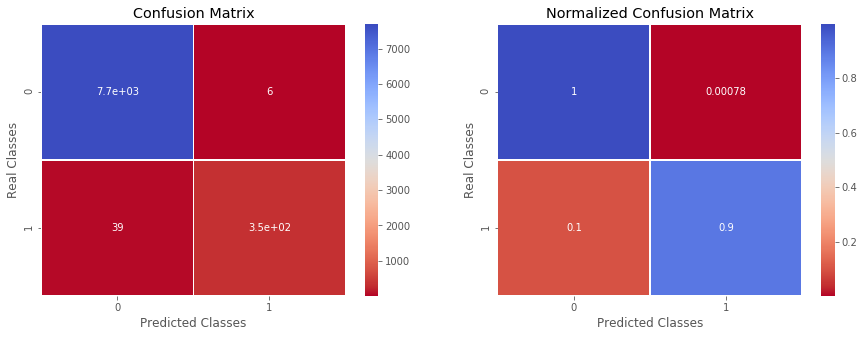

---Classification Report---
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      7700
           1       0.98      0.90      0.94       389

    accuracy                           0.99      8089
   macro avg       0.99      0.95      0.97      8089
weighted avg       0.99      0.99      0.99      8089



In [25]:
# ROC curve is not a good indicator for highly imbalanced data since False Positive Rate doesn't drop much when the Total Real Negatives is large.

def PlotConfusionMatrix(y_test, pred, y_test_noarrest, y_test_arrest):

    cfn_matrix = confusion_matrix(y_test, pred)
    cfn_norm_matrix = np.array([[1.0 / y_test_noarrest,1.0/y_test_noarrest],[1.0/y_test_arrest,1.0/y_test_arrest]])
    norm_cfn_matrix = cfn_matrix * cfn_norm_matrix

    fig = plt.figure(figsize=(15,5))
    ax = fig.add_subplot(1,2,1)
    sns.heatmap(cfn_matrix,cmap='coolwarm_r',linewidths=0.5,annot=True,ax=ax)
    plt.title('Confusion Matrix')
    plt.ylabel('Real Classes')
    plt.xlabel('Predicted Classes')

    ax = fig.add_subplot(1,2,2)
    sns.heatmap(norm_cfn_matrix,cmap='coolwarm_r',linewidths=0.5,annot=True,ax=ax)

    plt.title('Normalized Confusion Matrix')
    plt.ylabel('Real Classes')
    plt.xlabel('Predicted Classes')
    plt.show()
    
    print('---Classification Report---')
    print(classification_report(y_test, pred))

PlotConfusionMatrix(y_test, pred, y_test_noarrest, y_test_arrest)

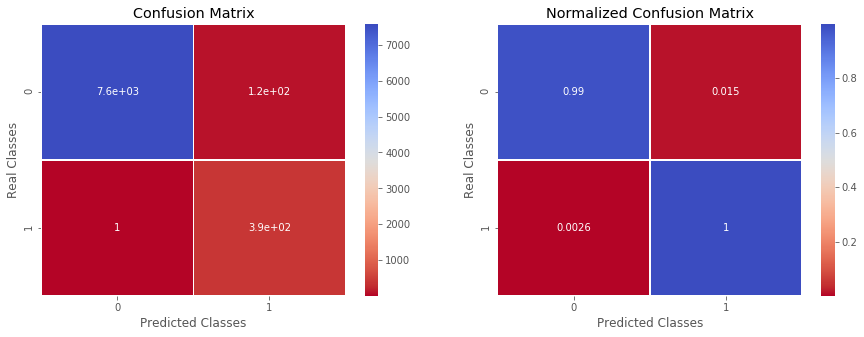

---Classification Report---
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      7700
           1       0.77      1.00      0.87       389

    accuracy                           0.99      8089
   macro avg       0.89      0.99      0.93      8089
weighted avg       0.99      0.99      0.99      8089



In [26]:
lr_model = LogisticRegression(class_weight='balanced')
lr_model.fit(X_train,y_train)

pred = lr_model.predict(X_test)

PlotConfusionMatrix(y_test, pred, y_test_noarrest, y_test_arrest)

# SMOTENC

In [27]:
# Class balancing with SMOTE on categorical data.

from imblearn.over_sampling import SMOTENC
smote_nc = SMOTENC(categorical_features=[0, 2], random_state=0)
X_train_resampled, y_train_resampled = smote_nc.fit_resample(X_train, y_train)
print('-----------------------------------------')
print('Synthetic sample class distribution: \n')
print(pd.Series(y_train_resampled).value_counts()) 

-----------------------------------------
Synthetic sample class distribution: 

1    30556
0    30556
Name: arrest_flag, dtype: int64


# Feature Selection

In [28]:
scaler = StandardScaler()
# fit the scaler to the training data
scaler.fit(X_train_resampled)
#transform the training data
X_trainFS = pd.DataFrame(data = scaler.transform(X_train_resampled), columns = features.columns)
#transform the testing dat
X_testFS = pd.DataFrame(data = scaler.transform(X_test), columns = features.columns)

In [29]:
from sklearn.linear_model import Lasso
from sklearn import metrics 
from sklearn.metrics import accuracy_score, f1_score, recall_score
lasso = Lasso(alpha = 0.001, normalize = False)
lasso = lasso.fit(X_train_resampled, y_train_resampled)
y_train_predFS = lasso.predict(X_train_resampled)
# y_test_pred_fs = lasso.predict(X_test_fs)

In [30]:
lasso.coef_

array([-3.71045243e-04, -8.59219872e-03, -1.24049691e-02, -1.68374851e-02,
       -1.63092439e-02, -1.23419687e-02, -1.24622110e-02,  4.48656368e-01,
       -0.00000000e+00, -5.56233675e-02, -0.00000000e+00,  0.00000000e+00,
        1.16243948e-01, -5.84589734e-02, -5.70690969e-02, -4.43039797e-01,
        0.00000000e+00, -1.00096876e-02, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -2.85846696e-03, -1.86435840e-03, -0.00000000e+00,
       -1.31611804e-03, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -4.66821285e-03,  0.00000000e+00, -9.46985976e-04,
       -0.00000000e+00, -8.66450493e-03])

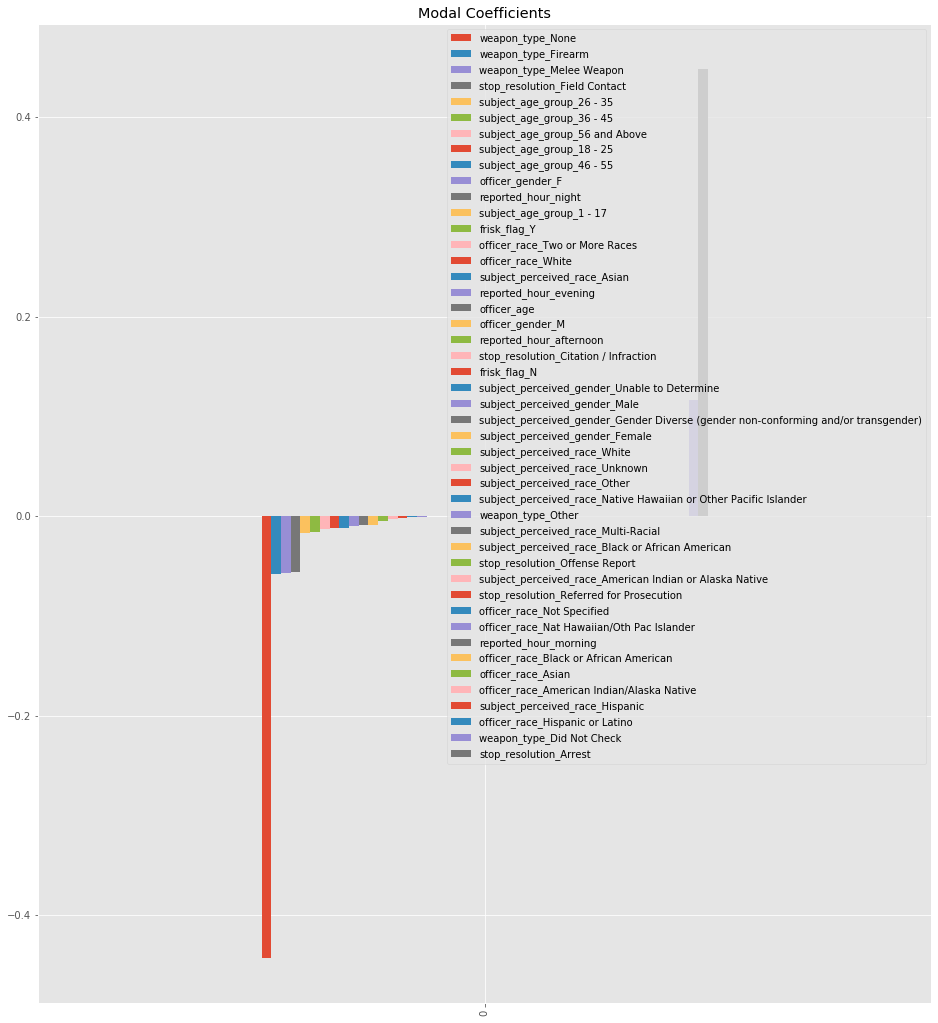

In [31]:
lasso_coef = pd.DataFrame(data=lasso.coef_).T
lasso_coef.columns = X_trainFS.columns
lasso_coef = lasso_coef.T.sort_values(by=0).T
lasso_coef.plot(kind='bar', title='Modal Coefficients', legend=True, figsize=(16,18))

In [32]:
lasso_coef.T

,0
weapon_type_None,-0.443040
weapon_type_Firearm,-0.058459
weapon_type_Melee Weapon,-0.057069
stop_resolution_Field Contact,-0.055623
subject_age_group_26 - 35,-0.016837
subject_age_group_36 - 45,-0.016309
subject_age_group_56 and Above,-0.012462
subject_age_group_18 - 25,-0.012405
subject_age_group_46 - 55,-0.012342
officer_gender_F,-0.010010


In [33]:
# Removing features where coefficient dropped to 0

X_train_resampled = X_train_resampled[['weapon_type_None', 'weapon_type_Melee Weapon', 'stop_resolution_Field Contact', 'subject_age_group_26 - 35', 'subject_age_group_36 - 45', 'subject_age_group_56 and Above', 'subject_age_group_18 - 25', 'subject_age_group_46 - 55', 'officer_gender_F', 'reported_hour_night', 'subject_age_group_1 - 17', 'frisk_flag_Y', 'officer_race_Two or More Races', 'officer_race_White', 'subject_perceived_race_Asian', 'reported_hour_evening', 'officer_age', 'weapon_type_Did Not Check', 'stop_resolution_Arrest']]
X_test = X_test[['weapon_type_None', 'weapon_type_Melee Weapon', 'stop_resolution_Field Contact', 'subject_age_group_26 - 35', 'subject_age_group_36 - 45', 'subject_age_group_56 and Above', 'subject_age_group_18 - 25', 'subject_age_group_46 - 55', 'officer_gender_F', 'reported_hour_night', 'subject_age_group_1 - 17', 'frisk_flag_Y', 'officer_race_Two or More Races', 'officer_race_White', 'subject_perceived_race_Asian', 'reported_hour_evening', 'officer_age', 'weapon_type_Did Not Check', 'stop_resolution_Arrest']]

In [34]:
X_test.head(3)

,weapon_type_None,weapon_type_Melee Weapon,stop_resolution_Field Contact,subject_age_group_26 - 35,subject_age_group_36 - 45,subject_age_group_56 and Above,subject_age_group_18 - 25,subject_age_group_46 - 55,officer_gender_F,reported_hour_night,subject_age_group_1 - 17,frisk_flag_Y,officer_race_Two or More Races,officer_race_White,subject_perceived_race_Asian,reported_hour_evening,officer_age,weapon_type_Did Not Check,stop_resolution_Arrest
3859,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,35,0,1
5644,1,0,0,0,0,0,1,0,1,1,0,1,1,0,0,0,40,0,1
13105,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,44,0,0


In [35]:
X_train_resampled.head(3)

,weapon_type_None,weapon_type_Melee Weapon,stop_resolution_Field Contact,subject_age_group_26 - 35,subject_age_group_36 - 45,subject_age_group_56 and Above,subject_age_group_18 - 25,subject_age_group_46 - 55,officer_gender_F,reported_hour_night,subject_age_group_1 - 17,frisk_flag_Y,officer_race_Two or More Races,officer_race_White,subject_perceived_race_Asian,reported_hour_evening,officer_age,weapon_type_Did Not Check,stop_resolution_Arrest
0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,39,0,1
1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,31,0,1
2,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,31,0,0


# KNN

In [36]:
def find_best_k(X_train_resampled, y_train_resampled, X_test, y_test, min_k=1, max_k=25):
    best_k = 0
    best_score = 0.0
    for k in range(min_k, max_k+1, 2):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train_resampled, y_train_resampled)
        preds = knn.predict(X_test)
        f1 = f1_score(y_test, preds)
        if f1 > best_score:
            best_k = k
            best_score = f1
    
    print("Best Value for k: {}".format(best_k))
    print("F1-Score: {}".format(best_score))

In [37]:
#find_best_k(X_train_resampled, y_train_resampled, X_test, y_test, min_k=1, max_k=25)

# Best value for K is 1

Test F1 score:  0.8275084554678691
Test Accuracy score:  0.9810854246507603


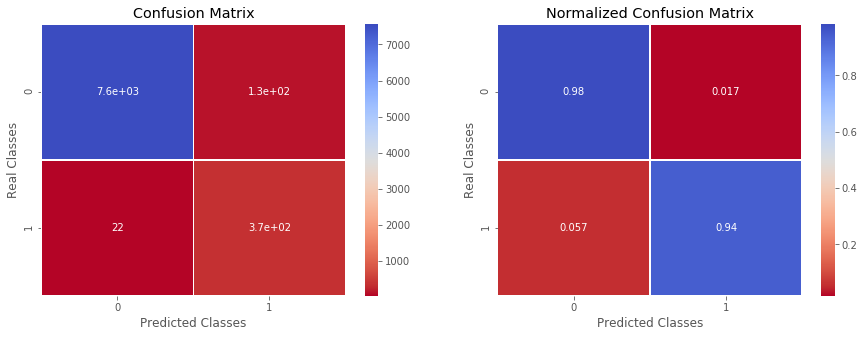

---Classification Report---
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      7700
           1       0.74      0.94      0.83       389

    accuracy                           0.98      8089
   macro avg       0.87      0.96      0.91      8089
weighted avg       0.98      0.98      0.98      8089



In [38]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_resampled, y_train_resampled)
knn_preds = knn.predict(X_test)
knn_f1 = metrics.f1_score(y_test, knn_preds)
knn_acc = metrics.accuracy_score(y_test, knn_preds)
print('Test F1 score: ', knn_f1)
print('Test Accuracy score: ', knn_acc)
PlotConfusionMatrix(y_test, knn_preds, y_test_noarrest, y_test_arrest)

# Logistic Regression

Test F1 score:  0.8584169453734671
Test Accuracy score:  0.9842996662133762


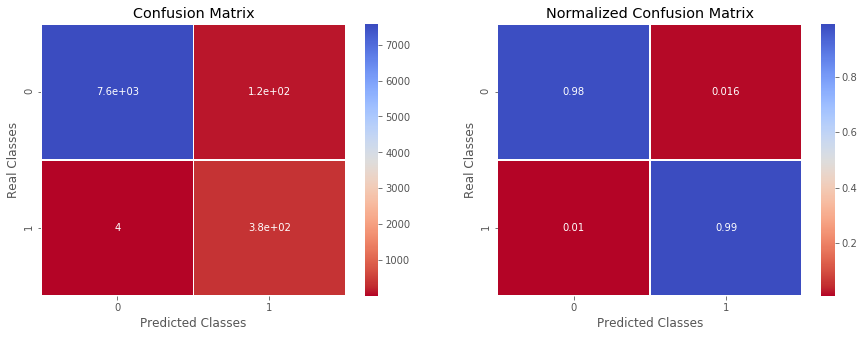

---Classification Report---
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      7700
           1       0.76      0.99      0.86       389

    accuracy                           0.98      8089
   macro avg       0.88      0.99      0.93      8089
weighted avg       0.99      0.98      0.99      8089



In [39]:
lr = LogisticRegression(class_weight='balanced')
lr.fit(X_train_resampled, y_train_resampled)
lr_preds = lr.predict(X_test)
lr_f1 = metrics.f1_score(y_test, lr_preds)
lr_acc = metrics.accuracy_score(y_test, lr_preds)
print('Test F1 score: ', lr_f1)
print('Test Accuracy score: ', lr_acc)
PlotConfusionMatrix(y_test, lr_preds, y_test_noarrest, y_test_arrest)

# Decision Tree

In [ ]:
# Best value for depth is 4.

SEED = 1
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
   dt = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth, random_state=SEED)
   dt.fit(X_train_resampled, y_train_resampled)
   train_pred = dt.predict(X_train_resampled)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train_resampled, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous train results
   train_results.append(roc_auc)
   y_pred = dt.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous test results
   test_results.append(roc_auc)
    
plt.figure(figsize=(12,6))
plt.plot(max_depths, train_results, 'b', label='Train AUC')
plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.legend()
plt.show()

In [ ]:
# The best value for max feature size is 5
max_features = list(range(1, X_train_resampled.shape[1]))
train_results = []
test_results = []
for max_feature in max_features:
   dt = DecisionTreeClassifier(criterion='entropy', max_features=max_feature, random_state=SEED)
   dt.fit(X_train_resampled, y_train_resampled)
   train_pred = dt.predict(X_train_resampled)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train_resampled, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = dt.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)

plt.figure(figsize=(12,6))
plt.plot(max_features, train_results, 'b', label='Train AUC')
plt.plot(max_features, test_results, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('max features')
plt.legend()
plt.show()

Test F1 score:  0.838569880823402
Test Accuracy score:  0.9815799233527012


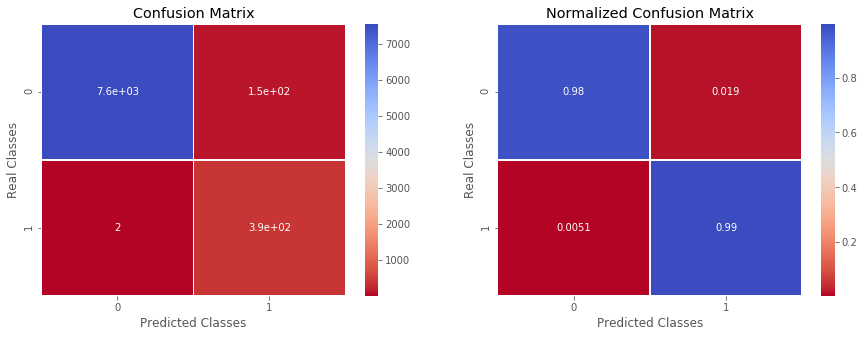

---Classification Report---
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      7700
           1       0.72      0.99      0.84       389

    accuracy                           0.98      8089
   macro avg       0.86      0.99      0.91      8089
weighted avg       0.99      0.98      0.98      8089



In [45]:
dtc = DecisionTreeClassifier(criterion='entropy', max_depth=4, max_features=5, class_weight='balanced')
dtc.fit(X_train_resampled, y_train_resampled)
dtc_preds  = dtc.predict(X_test)
dtc_f1 = metrics.f1_score(y_test, dtc_preds)
dtc_acc = metrics.accuracy_score(y_test, dtc_preds)
print('Test F1 score: ', dtc_f1)
print('Test Accuracy score: ', dtc_acc)
PlotConfusionMatrix(y_test, dtc_preds, y_test_noarrest, y_test_arrest)

# Random Forest

Test F1 score:  0.9015795868772782
Test Accuracy score:  0.9899864012856966


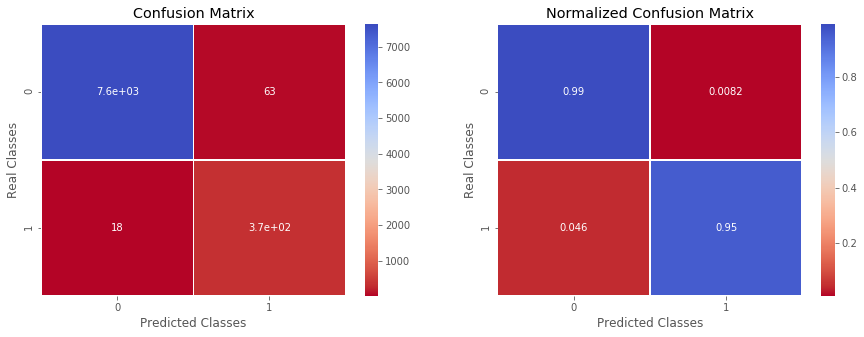

---Classification Report---
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      7700
           1       0.85      0.95      0.90       389

    accuracy                           0.99      8089
   macro avg       0.93      0.97      0.95      8089
weighted avg       0.99      0.99      0.99      8089



In [51]:
rfc = RandomForestClassifier (n_estimators = 100, class_weight = 'balanced')
rfc.fit(X_train_resampled, y_train_resampled)
rfc_preds = rfc.predict(X_test)
rfc_f1 = metrics.f1_score(y_test, rfc_preds)
rfc_acc = metrics.accuracy_score(y_test, rfc_preds)
print('Test F1 score: ', rfc_f1)
print('Test Accuracy score: ', rfc_acc)
PlotConfusionMatrix(y_test, rfc_preds, y_test_noarrest, y_test_arrest)

# XGBoost

Test F1 score:  0.9004854368932038
Test Accuracy score:  0.9898627766102114


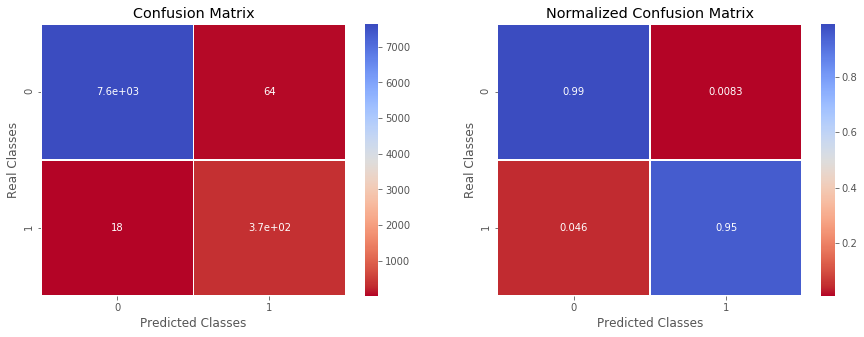

---Classification Report---
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      7700
           1       0.85      0.95      0.90       389

    accuracy                           0.99      8089
   macro avg       0.93      0.97      0.95      8089
weighted avg       0.99      0.99      0.99      8089



In [50]:
import xgboost as xgb
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train_resampled, y_train_resampled)
xgb_preds = rfc.predict(X_test)
xgb_f1 = metrics.f1_score(y_test, xgb_preds)
xgb_acc = metrics.accuracy_score(y_test, xgb_preds)
print('Test F1 score: ', xgb_f1)
print('Test Accuracy score: ', xgb_acc)
PlotConfusionMatrix(y_test, xgb_preds, y_test_noarrest, y_test_arrest)

# GridSearchCV - Logistic Regression

In [54]:
log_param = {
        'C':[0.001, 0.01, 0.1, 1],
        'penalty': ['l1', 'l2']
}

In [55]:
lr_grid = LogisticRegression(random_state=1)
lr_CV = GridSearchCV(estimator=lr_grid, param_grid=log_param, cv=5, scoring='f1', verbose=1, n_jobs=-1)
lr_CV.fit(X_train_resampled, y_train_resampled)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    3.2s finished


GridSearchCV(cv=5, estimator=LogisticRegression(random_state=1), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1], 'penalty': ['l1', 'l2']},
             scoring='f1', verbose=1)

In [56]:
print(lr_CV.best_params_)
print(lr_CV.best_estimator_)
print(lr_CV.best_score_)

{'C': 1, 'penalty': 'l2'}
LogisticRegression(C=1, random_state=1)
0.9901445870132422


Test F1 score: 0.8584169453734671
Test Accuracy score: 0.9842996662133762


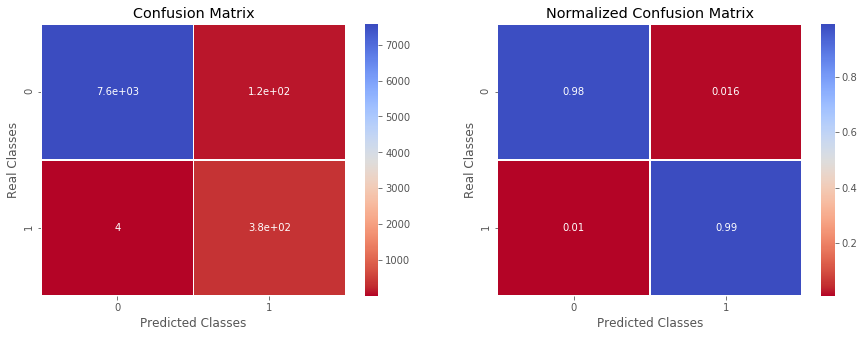

---Classification Report---
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      7700
           1       0.76      0.99      0.86       389

    accuracy                           0.98      8089
   macro avg       0.88      0.99      0.93      8089
weighted avg       0.99      0.98      0.99      8089



In [59]:
lr_CV_test = lr_CV.best_estimator_.predict(X_test)
print('Test F1 score:', metrics.f1_score(y_test, lr_CV_test))
print('Test Accuracy score:', metrics.accuracy_score(y_test, lr_CV_test))
PlotConfusionMatrix(y_test, lr_CV_test, y_test_noarrest, y_test_arrest)

# GridSearchCV - Random Forest

In [61]:
rf_param = {
        'n_estimators': [50, 100, 200],
        'max_features': [0.10, 0.25, 0.50],
        'max_depth': [5, 7, 9],
        'criterion': ['gini', 'entropy']
}

In [63]:
rf_CV = RandomForestClassifier(random_state=1)
rf_CV = GridSearchCV(estimator=rf_CV, param_grid=rf_param, cv=5, scoring='f1', verbose=1, n_jobs=-1)
rf_CV.fit(X_train_resampled, y_train_resampled)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   29.7s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:  8.6min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 7, 9],
                         'max_features': ['auto', 0.1, 0.25, 0.5],
                         'n_estimators': [50, 100, 200, 300]},
             scoring='f1', verbose=1)

In [64]:
print(rf_CV.best_params_)
print(rf_CV.best_estimator_)
print(rf_CV.best_score_)

{'criterion': 'gini', 'max_depth': 9, 'max_features': 0.5, 'n_estimators': 100}
RandomForestClassifier(max_depth=9, max_features=0.5, random_state=1)
0.9912386773750631


Test F1 score: 0.8616071428571428
Test Accuracy score: 0.9846705402398319


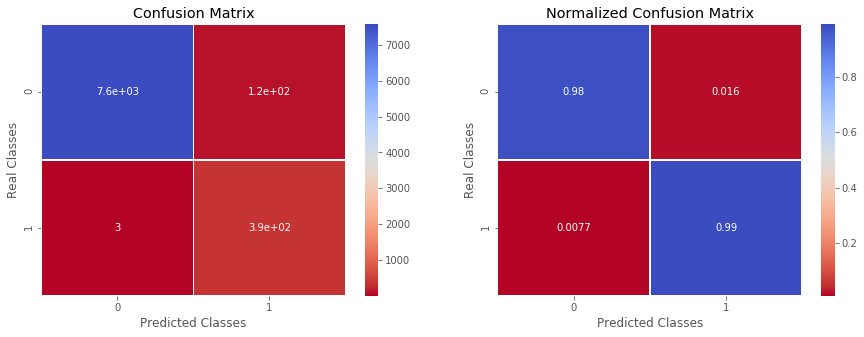

---Classification Report---
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      7700
           1       0.76      0.99      0.86       389

    accuracy                           0.98      8089
   macro avg       0.88      0.99      0.93      8089
weighted avg       0.99      0.98      0.99      8089



In [69]:
rf_CV_test = rf_CV.best_estimator_.predict(X_test)
print('Test F1 score:', metrics.f1_score(y_test, rf_CV_test))
print('Test Accuracy score:', metrics.accuracy_score(y_test, rf_CV_test))
PlotConfusionMatrix(y_test, rf_CV_test, y_test_noarrest, y_test_arrest)

# GridSearchCV - XGBoost

In [72]:
xgb_param = {
        'learning_rate': [0.1, 0.01],
        'max_depth': [3, 5, 7],
        'min_child_weight': [1.0],
        'subsample': [0.25, 0.5, 1.0],
        'n_estimators': [50, 100, 150]
}

In [73]:
xgb_CV = GridSearchCV(estimator=xgb, param_grid=xgb_param, cv=5, scoring='f1', verbose=1, n_jobs=-1)
xgb_CV.fit(X_train_resampled, y_train_resampled)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  9.6min
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed: 14.0min finished


GridSearchCV(cv=5, estimator=XGBClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01], 'max_depth': [3, 5, 7],
                         'min_child_weight': [1.0],
                         'n_estimators': [50, 100, 150],
                         'subsample': [0.25, 0.5, 1.0]},
             scoring='f1', verbose=1)

In [74]:
print(xgb_CV.best_params_)
print(xgb_CV.best_estimator_)
print(xgb_CV.best_score_)

{'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 1.0, 'n_estimators': 150, 'subsample': 0.5}
XGBClassifier(max_depth=7, min_child_weight=1.0, n_estimators=150,
              subsample=0.5)
0.9931096140242541


Test F1 score: 0.8984468339307049
Test Accuracy score: 0.9894919025837557


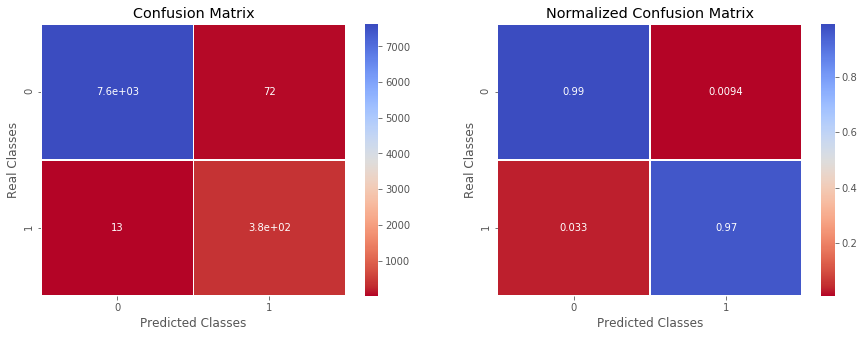

---Classification Report---
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      7700
           1       0.84      0.97      0.90       389

    accuracy                           0.99      8089
   macro avg       0.92      0.98      0.95      8089
weighted avg       0.99      0.99      0.99      8089



In [75]:
xgb_CV_test = xgb_CV.best_estimator_.predict(X_test)
print('Test F1 score:', metrics.f1_score(y_test, xgb_CV_test))
print('Test Accuracy score:', metrics.accuracy_score(y_test, xgb_CV_test))
PlotConfusionMatrix(y_test, xgb_CV_test, y_test_noarrest, y_test_arrest)

# Voting Classifier

In [76]:
from sklearn.ensemble import VotingClassifier

In [77]:
voting_clf = VotingClassifier(
                estimators=[('knneighbors', knn), ('logregbest', lr_CV), ('decisiontree', dtc), ('xgbbest', xgb_CV), ('randomforestbest', rf_CV)], 
                voting='soft')
voting_clf.fit(X_train_resampled, y_train_resampled)
vc_preds = voting_clf.predict(X_test)
vc_f1 = metrics.f1_score(y_test, vc_preds)
vc_acc = metrics.accuracy_score(y_test, vc_preds)
print('Test F1 score: ', vc_f1)
print('Test Accuracy score: ', vc_acc)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    3.2s finished


Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  9.8min
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed: 14.7min finished


Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   33.7s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:  9.3min finished


Test F1 score:  0.8590604026845639
Test Accuracy score:  0.9844232908888614
